<a href="https://colab.research.google.com/github/kowshiksarker/Analytics-Repo/blob/master/PIMA_Diabetes_Dataset_RandomForest_DecisionTree_KowshikSarker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**To Predict Diabetes Using PIMA Diabetes data**

Dataset Link - > "https://www.kaggle.com/uciml/pima-indians-diabetes-database?select=diabetes.csv"

**Importing Libraries**


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("diabetes.csv")

**Exploratory Data Analysis**

In [ ]:
data.shape

(768, 9)

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Check if any null value is present in the dataset
data.isnull().values.any()

False

In [ ]:
# Correlation between the features
correl=data.corr()
correl

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


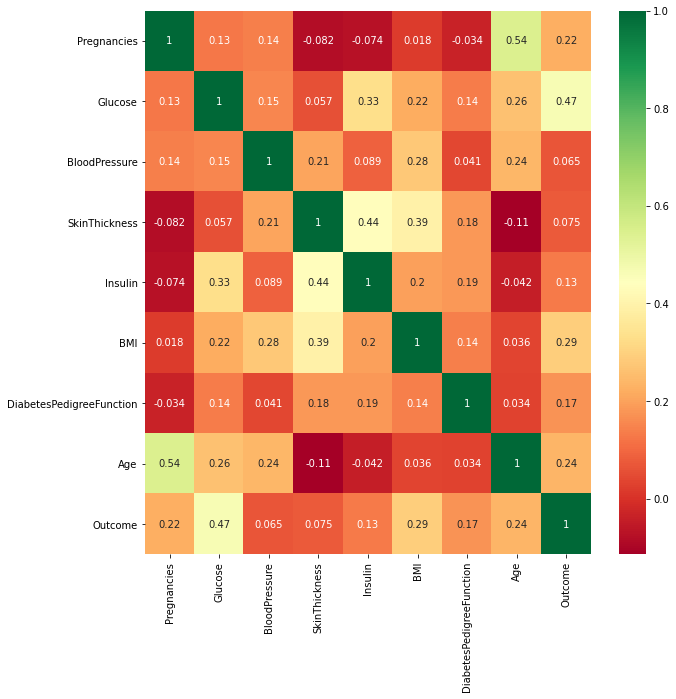

In [ ]:
# Correlation heat map
corr_features=correl.index
plt.figure(figsize=(10,10))
h=sns.heatmap(data[corr_features].corr(),annot=True,cmap='RdYlGn')

0    500
1    268
Name: Outcome, dtype: int64


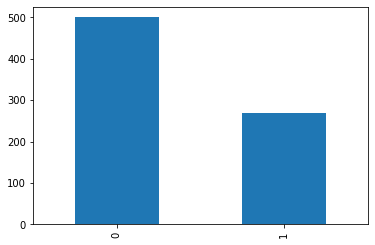

In [ ]:
# number of diabetic and nondiabetic cases present in the dataset
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(data.Outcome.value_counts())
p=data.Outcome.value_counts().plot(kind="bar")

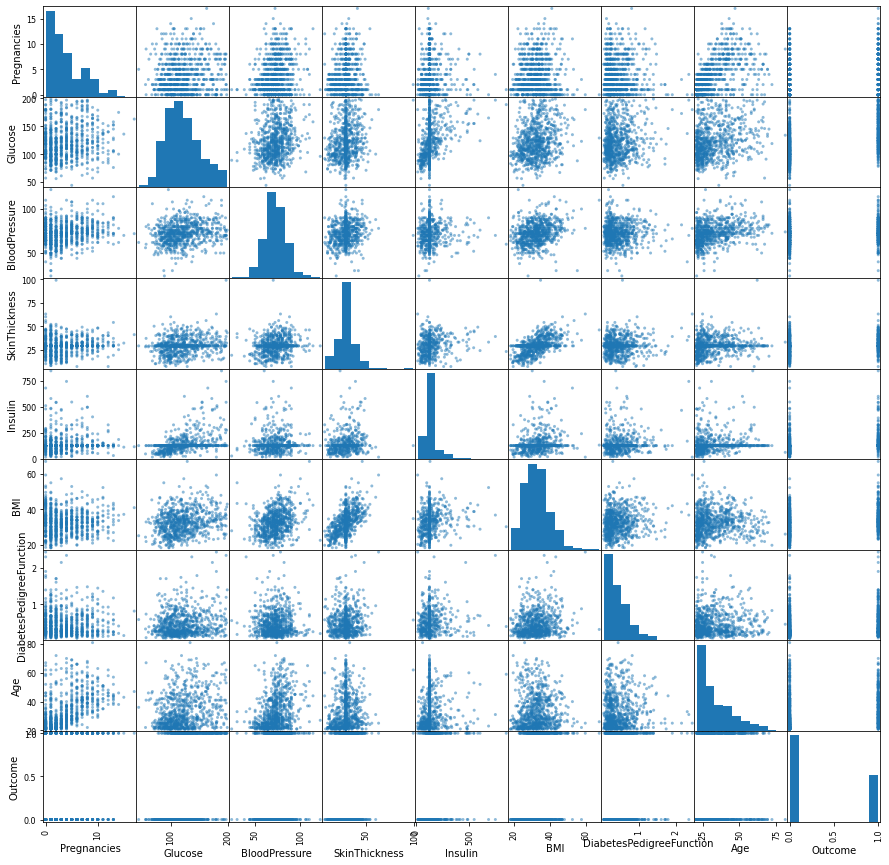

In [ ]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(data,figsize=(15,15))

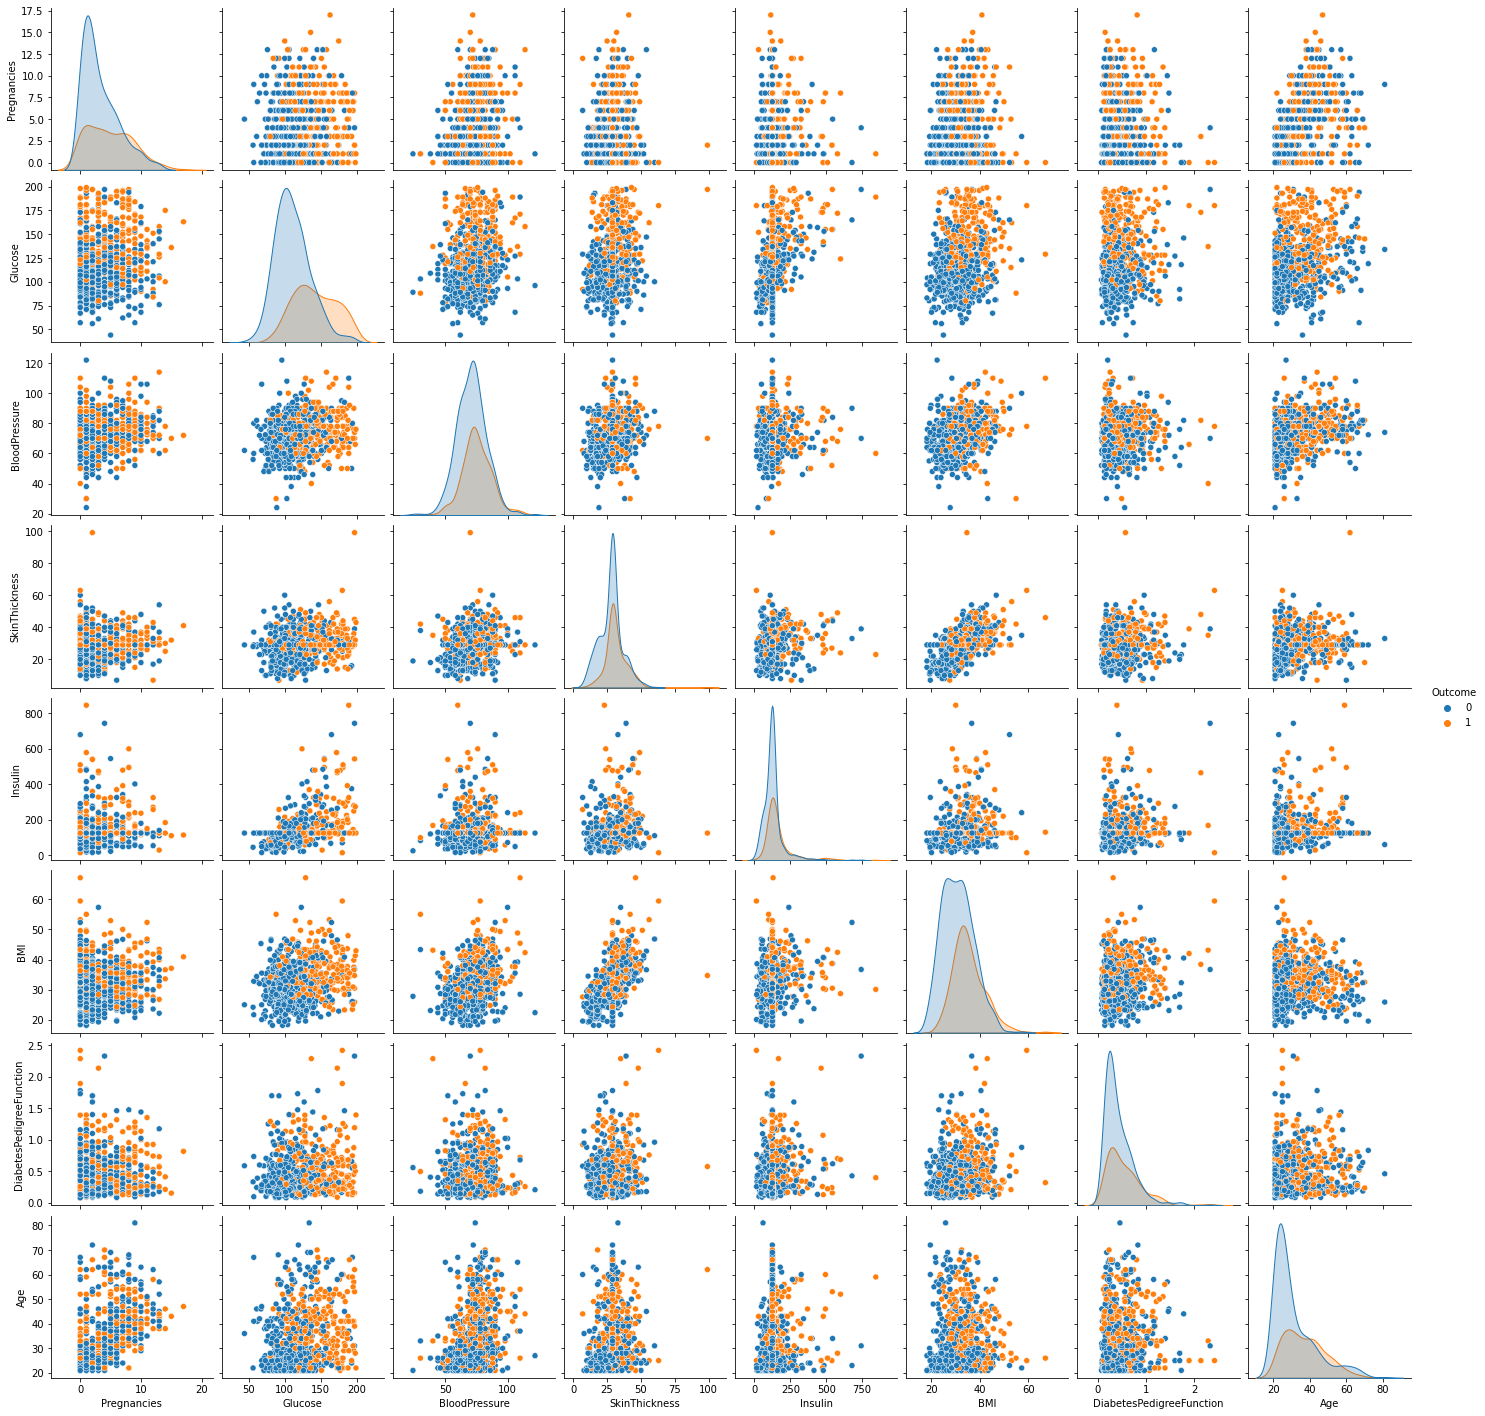

In [ ]:
p=sns.pairplot(data, hue = 'Outcome')

**Distribution Of All The Features In the Dataset**

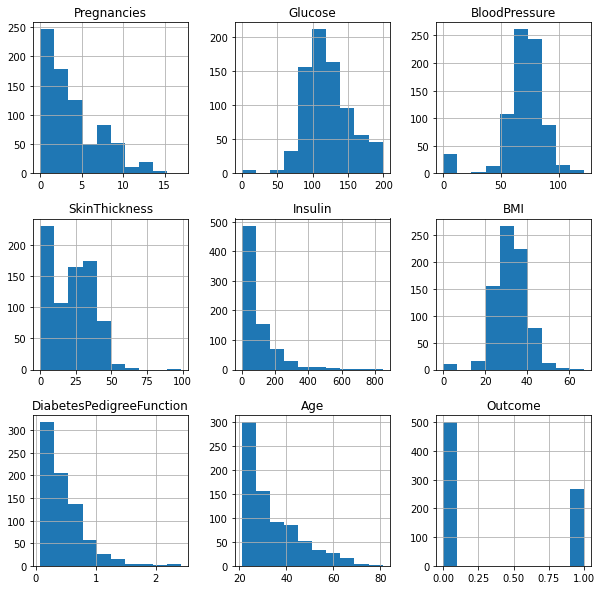

In [ ]:
p = data.hist(figsize = (10,10))

**Checking Zero Values For The Features And Do the Necessary Data Preprocessing**

We can see from above many columns have 0 value i.e. SkinThickness,Insulin, etc which is not logical in nature. This is happening due to non availability of the data for that particular record.In this case we can do the mean-meadian imputation based on the distribution of the data for that particular column. But before that we need to know for which columns we have this kind of issues.

In [ ]:
print("Total number of rows : {0}".format(len(data)))
print("Number of missing rows in Glucose: {0}".format(len(data.loc[data['Glucose']==0])))
print("Number of missing rows in BloodPressure: {0}".format(len(data.loc[data['BloodPressure']==0])))
print("Number of missing rows in SkinThickness: {0}".format(len(data.loc[data['SkinThickness']==0])))
print("Number of missing rows in Insulin: {0}".format(len(data.loc[data['Insulin']==0])))
print("Number of missing rows in BMI: {0}".format(len(data.loc[data['BMI']==0])))
print("Number of missing rows in DiabetesPedigreeFunction: {0}".format(len(data.loc[data['DiabetesPedigreeFunction']==0])))
print("Number of missing rows in Age: {0}".format(len(data.loc[data['Age']==0])))

Total number of rows : 768
Number of missing rows in Glucose: 5
Number of missing rows in BloodPressure: 35
Number of missing rows in SkinThickness: 227
Number of missing rows in Insulin: 374
Number of missing rows in BMI: 11
Number of missing rows in DiabetesPedigreeFunction: 0
Number of missing rows in Age: 0


In [ ]:
#Let's populate the zeros with 'NA' so that we can do the mean-median imputation
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
## showing the count of Nans
print(data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
# Necessary mean-meadian value imputation
data['Glucose'].fillna(data['Glucose'].mean(), inplace = True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace = True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace = True)
data['Insulin'].fillna(data['Insulin'].median(), inplace = True)
data['BMI'].fillna(data['BMI'].median(), inplace = True)

In [ ]:
#No zero values are present
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


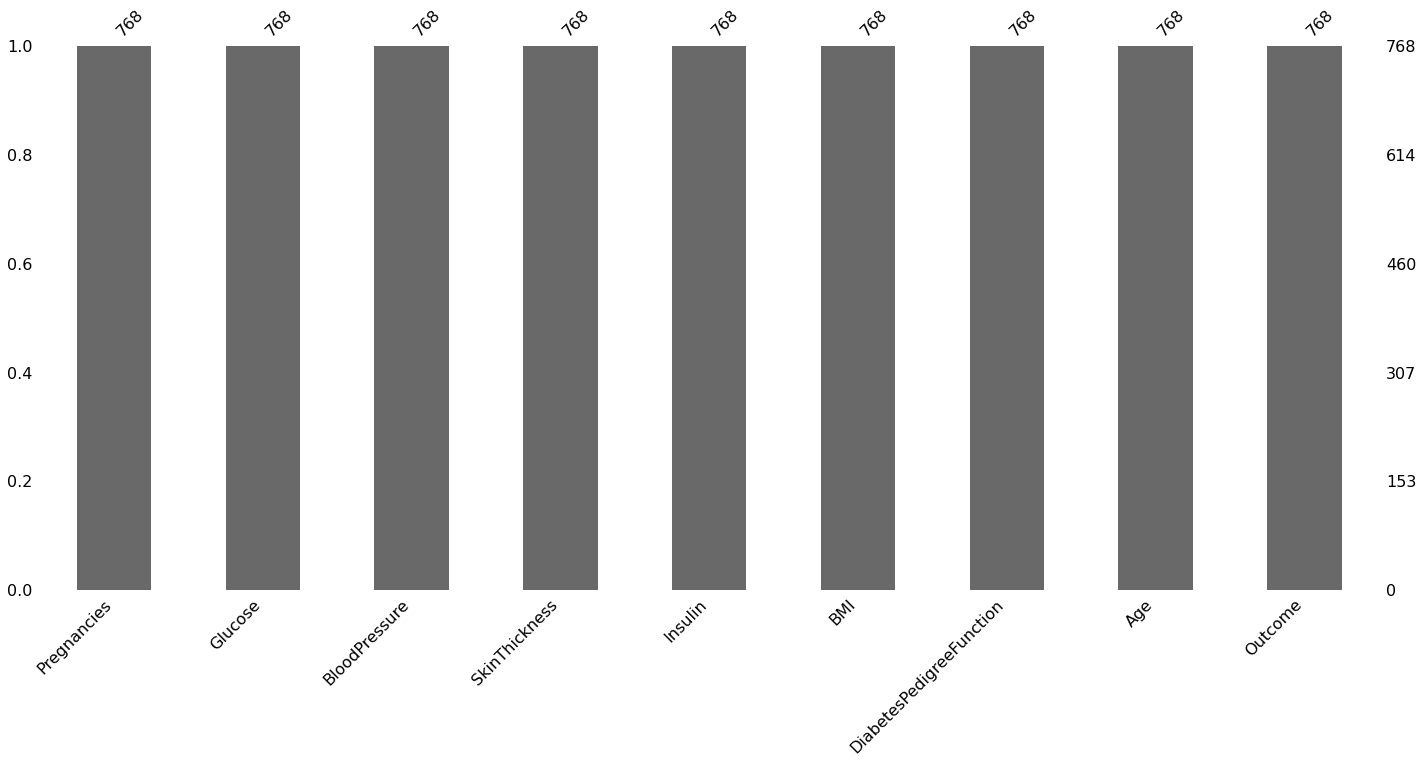

In [ ]:
## null count analysis
import missingno as msno
p=msno.bar(data)

We no successfully get rid of missing value issue. Now its time to apply the Algorithms for modeling and prediction. But before that, lets standardize the data, as it is a best practice always.

In [ ]:
#Standardizing the features in the dataset and splitting the feature and outcome vector
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
data_copy = data.copy(deep = True)
X =  pd.DataFrame(sc_X.fit_transform(data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [ ]:
y=data_copy.Outcome
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

**Classical Approach OF Splitting Data For Training and Testing**

In [ ]:
#Train-Test Splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

**Applying Random Forest Classifier**

In [ ]:
# Apply Algorithm

from sklearn.ensemble import RandomForestClassifier
rnf=RandomForestClassifier(random_state=10)
rnf.fit(X_train,y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

**Prediction and Evaluation Based On Random Forest Model**

In [ ]:
y_pred=rnf.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.74609375

We can see our model prediction accuracy score is around 75%, which is very good. Lets do some visualization to see how accurately our model perform to calssify the diabetic and non-diabetic patient based on the dataset.

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:313: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **scatter_highlight_kwargs)


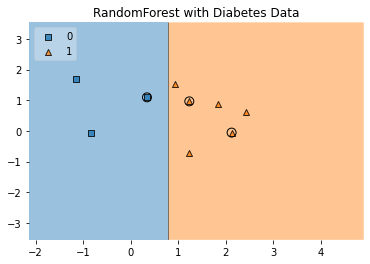

In [ ]:
from mlxtend.plotting import plot_decision_regions
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=rnf, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.title('RandomForest with Diabetes Data')
plt.show()

Let us see some metrics reports based on our Random Forest Model.

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,140,27,167
1,38,51,89
All,178,78,256


Text(0.5, 15.0, 'Predicted label')

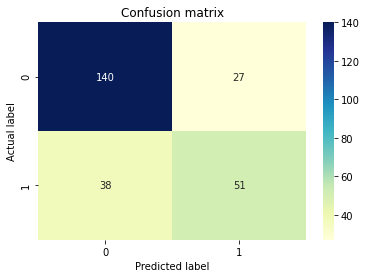

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       167
           1       0.65      0.57      0.61        89

    accuracy                           0.75       256
   macro avg       0.72      0.71      0.71       256
weighted avg       0.74      0.75      0.74       256



In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = rnf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

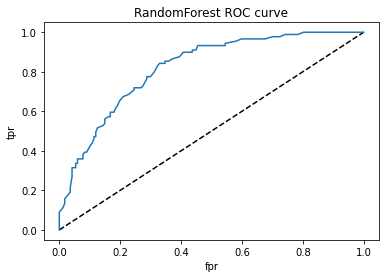

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='rnf')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('RandomForest ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8193837045011102

From the above metrics report we can see that our current random forest model is giving a good area under the ROC curve which is almost 82%. Now lets do some parameter tuning to see if we can increase the model accuracy and efficiecy.

**Hyperparameter Tunning and Selection Of Best Score and Best Parameters**

To find the best parameter and the best accuracy socre of our Random Forest model we are using GridSearch Cross Validation method as below.

In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_estimators':np.arange(1,100)}
rnf = RandomForestClassifier()
rnf_cv= GridSearchCV(rnf,param_grid,cv=5)
rnf_cv.fit(X,y)

print("Best Score:" + str(rnf_cv.best_score_))
print("Best Parameters: " + str(rnf_cv.best_params_))

Best Score:0.7734912146676852
Best Parameters: {'n_estimators': 43}


So we can see now after the parameter tunning, the best accuracy score we are now getting is 77% which is slightly better than the previous accuracy score of 75% and we can achieve this better accuracy by using number of estimator(n_estimator)=43 in RandomForestClassifier().

**Applying Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Prediction and Evaluation Based on Decision Tree Model**

In [ ]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       167
           1       0.55      0.58      0.57        89

    accuracy                           0.69       256
   macro avg       0.66      0.67      0.66       256
weighted avg       0.70      0.69      0.69       256



Text(0.5, 15.0, 'Predicted label')

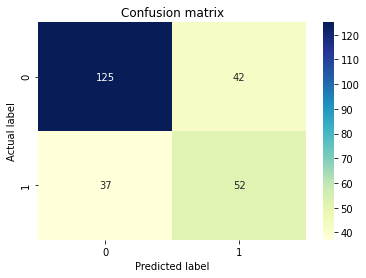

In [ ]:
from sklearn import metrics
cnf_matrix_dect = metrics.confusion_matrix(y_test, predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix_dect), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test,predictions)

0.69140625

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba_dect = dtree.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

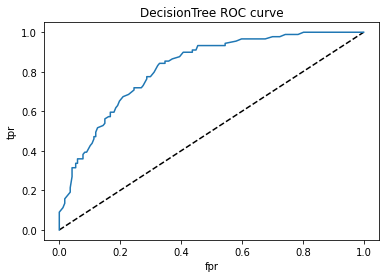

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='dtree')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('DecisionTree ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba_dect)

0.6663863284666621

**Tree Visualization**

In [ ]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X)
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
pip install graphviz

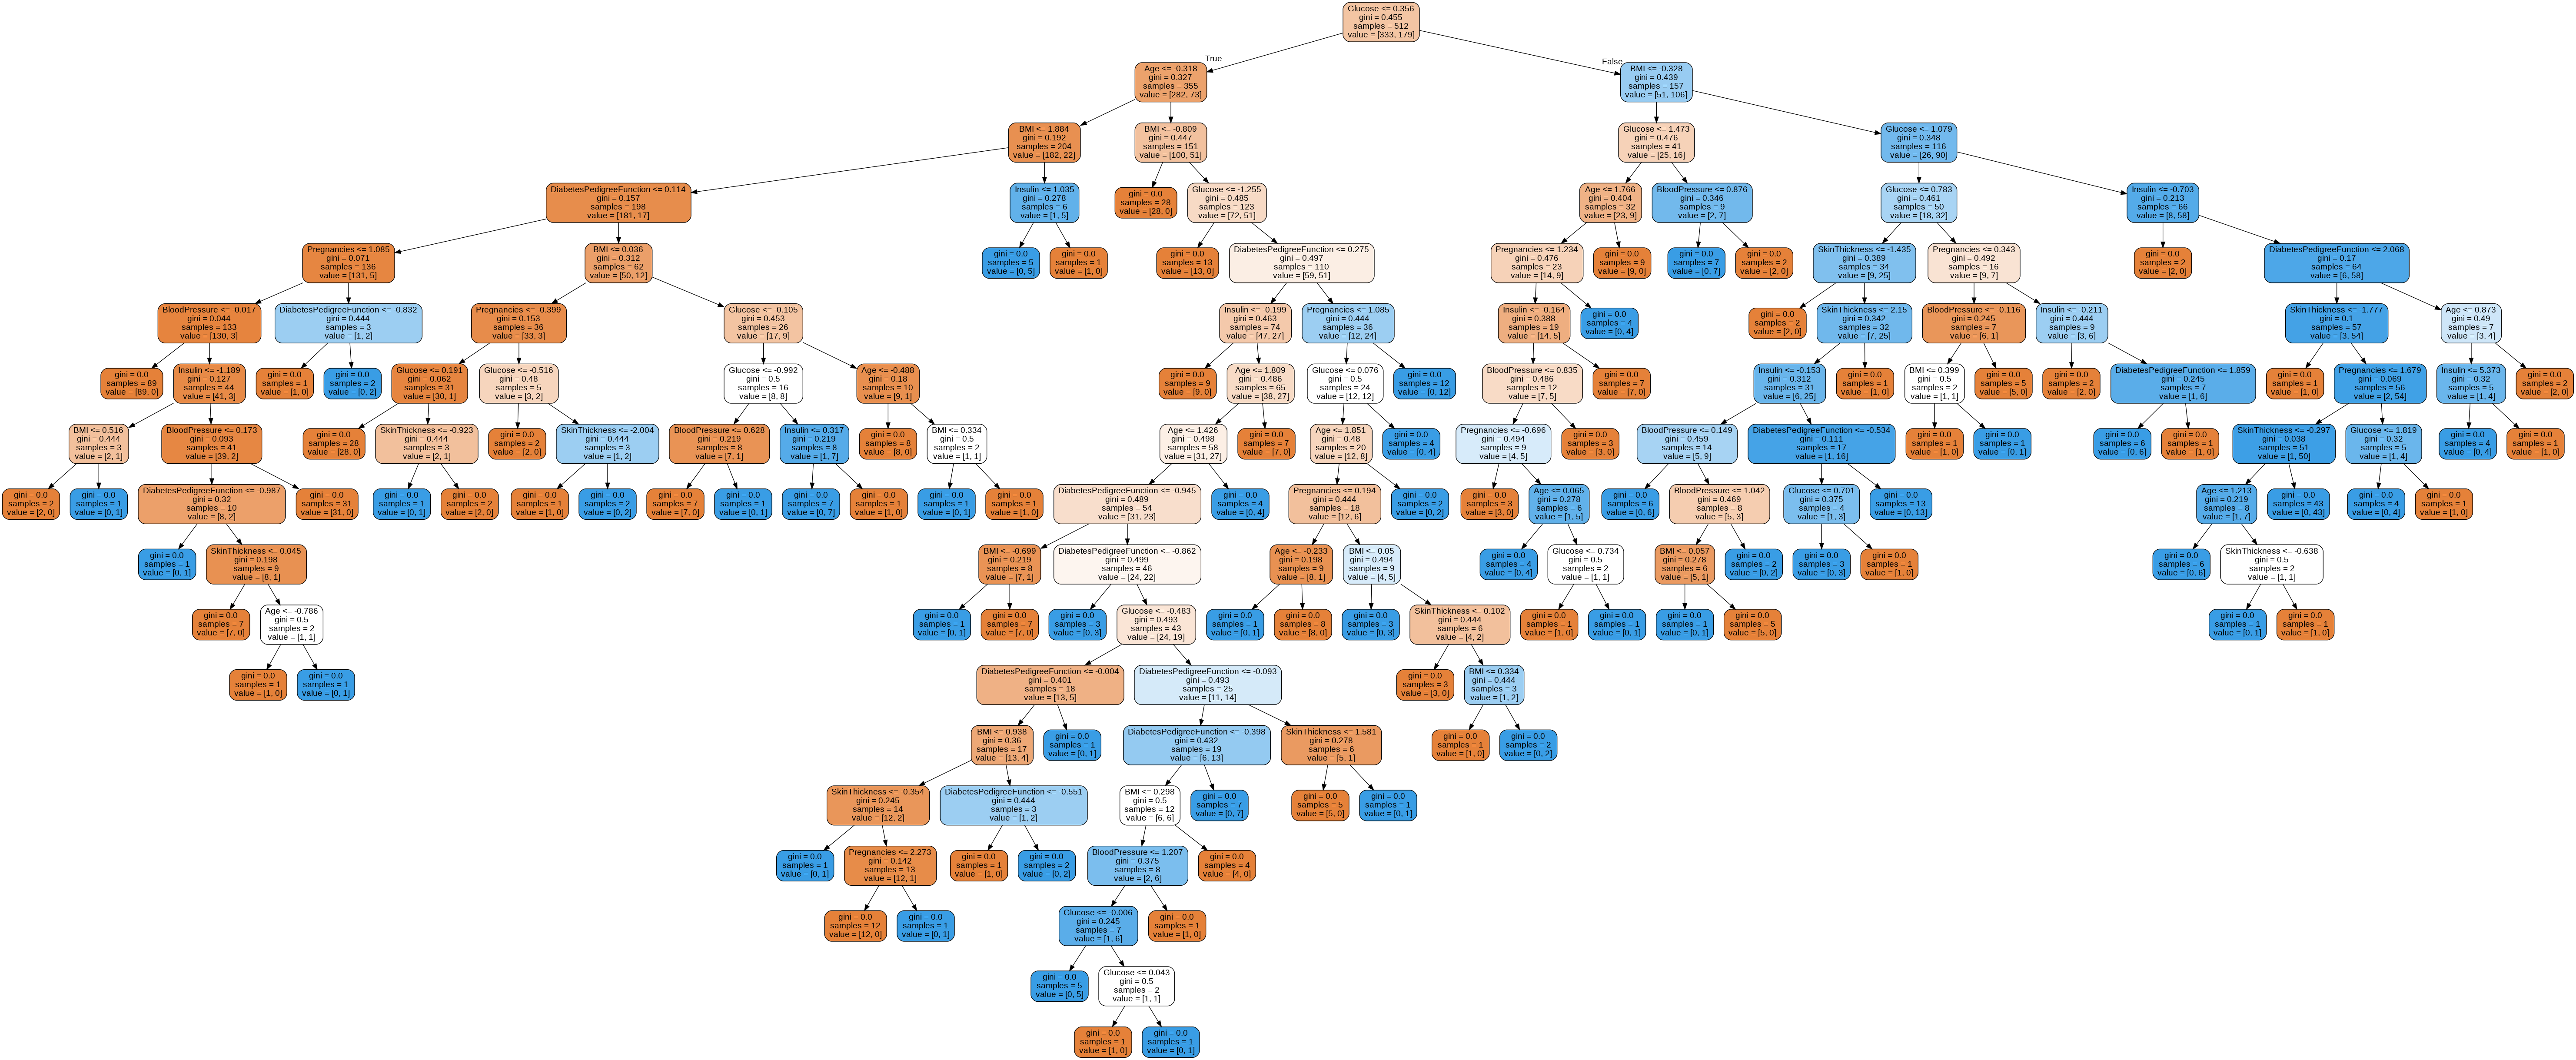

In [ ]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

**After applying the Decision Tree method the model is giving us the accuracy rate of 69% which is not so good and also less than our previous Random Forest model. Also the ROC curve area for the decision tree model is around 66% where as Random Forest gives us almost 82% area under the curve, which is far more better.Thus based on this dataset we can conclude that our RandomForest model is outperforming than our Decision Tree model.**

**Converting This collab Book into PDF**

In [ ]:
%%capture
!!jupyter nbconvert --to pdf RandomForest_DecisionTree_KowshikSarker_19BM61K09.ipynb